<a href="https://colab.research.google.com/github/KaraNuss/coding-intro/blob/main/Getting_Started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: First Steps

We will use the Google Colab Notebooks to start explore how we can use computer coding to analyze data. We will work with the programming language R, which is used extensively by biologists for statistics and data visualizations.

Any notebook I share will already be set up for R. If you create your own notebook, you must change this manually. To do so, go to the **Runtime** menu at the top of this screen, select **Change runtime type** and use the dropdown menu to switch from Python 3 to **R**.

The cell below makes available all of the packages we need. **Run** the cell by clicking the **Play arrow** or by holding down **Control/Enter (PC)** or **Command/Enter(Mac)**.

You may get a warning that the Notebook was not authored by Google but by another user (someone with an neiu.edu email address). Click **Run anyway** to continue.

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


We want to import some data that we can begin to analyze. The code below will access a data file I posted to a website. Soon, you will learn how to upload your own data files from Excel. Note that you won't see any **output** once the cell has run.

In [2]:
birds <- read.csv(url("https://raw.githubusercontent.com/KaraNuss/coding-intro/refs/heads/main/bird_observations.csv"))

In the cell above, we brought in our dataset and saved it under the name birds. You can now create a new cell for Code, by clicking on **+ Code** at the top right. Type birds (make sure not to capitalize) and **run** the cell to see our dataset.

In [3]:
# Make sure to cut out this  line in the student version.
birds

Day,Time,Woodpeckers,BlueJays
<int>,<chr>,<int>,<int>
1,morning,6,2
1,afternoon,3,2
2,morning,8,4
2,afternoon,5,6
3,morning,2,3
3,afternoon,0,7
4,morning,4,2
4,afternoon,6,8
5,morning,9,1


Wow, that's cool! This example dataset is pretty simple and small. Often we will have large and complex datasets where we can'st see everything at once. Luckily, there are some great tools to give us an overview of our data.

In [4]:
glimpse(birds)

Rows: 10
Columns: 4
$ Day         <int> 1, 1, 2, 2, 3, 3, 4, 4, 5, 5
$ Time        <chr> "morning", "afternoon", "morning", "afternoon", "morning",…
$ Woodpeckers <int> 6, 3, 8, 5, 2, 0, 4, 6, 9, 5
$ BlueJays    <int> 2, 2, 4, 6, 3, 7, 2, 8, 1, 2


# Question 1
Run the cell above and then describe what **glimpse** does. What information does it give us? (2 points)

*Replace this text with your answer.*




## Part 2: Descriptive Statistics

In [5]:
summary(birds)

      Day        Time            Woodpeckers      BlueJays  
 Min.   :1   Length:10          Min.   :0.00   Min.   :1.0  
 1st Qu.:2   Class :character   1st Qu.:3.25   1st Qu.:2.0  
 Median :3   Mode  :character   Median :5.00   Median :2.5  
 Mean   :3                      Mean   :4.80   Mean   :3.7  
 3rd Qu.:4                      3rd Qu.:6.00   3rd Qu.:5.5  
 Max.   :5                      Max.   :9.00   Max.   :8.0  

In [6]:
sd(birds$Woodpeckers)

[1] 2.699794

In [7]:
n <- length(birds$Woodpeckers)

In [8]:
SE_woodpeckers = sd(birds$Woodpeckers)/n

In [9]:
mean(birds$Woodpeckers)

[1] 4.8

In [10]:
birds <- mutate(birds, totalBirds = Woodpeckers + BlueJays)
# adds a column totalling the two groups of birds
# note that we rename to "save" this new version

In [11]:
birds

Day,Time,Woodpeckers,BlueJays,totalBirds
<int>,<chr>,<int>,<int>,<int>
1,morning,6,2,8
1,afternoon,3,2,5
2,morning,8,4,12
2,afternoon,5,6,11
3,morning,2,3,5
3,afternoon,0,7,7
4,morning,4,2,6
4,afternoon,6,8,14
5,morning,9,1,10


In [12]:
summarise(
  group_by(birds, Time),
  aveBirds = mean(totalBirds)
)i
# Note that time is showing values in alphabetical order so afternoon shows up first.

Time,aveBirds
<chr>,<dbl>
afternoon,8.8
morning,8.2


In [13]:
SE_woodpeckers

[1] 0.2699794

In [17]:
birds %>%
  group_by (Time) %>%
    summarise(
      meanBirds = mean(totalBirds),
      sdBirds = sd(totalBirds),
      seBirds = sd(totalBirds)/n

  )

Time,meanBirds,sdBirds,seBirds
<chr>,<dbl>,<dbl>,<dbl>
afternoon,8.8,3.633180,0.3633180
morning,8.2,2.863564,0.2863564


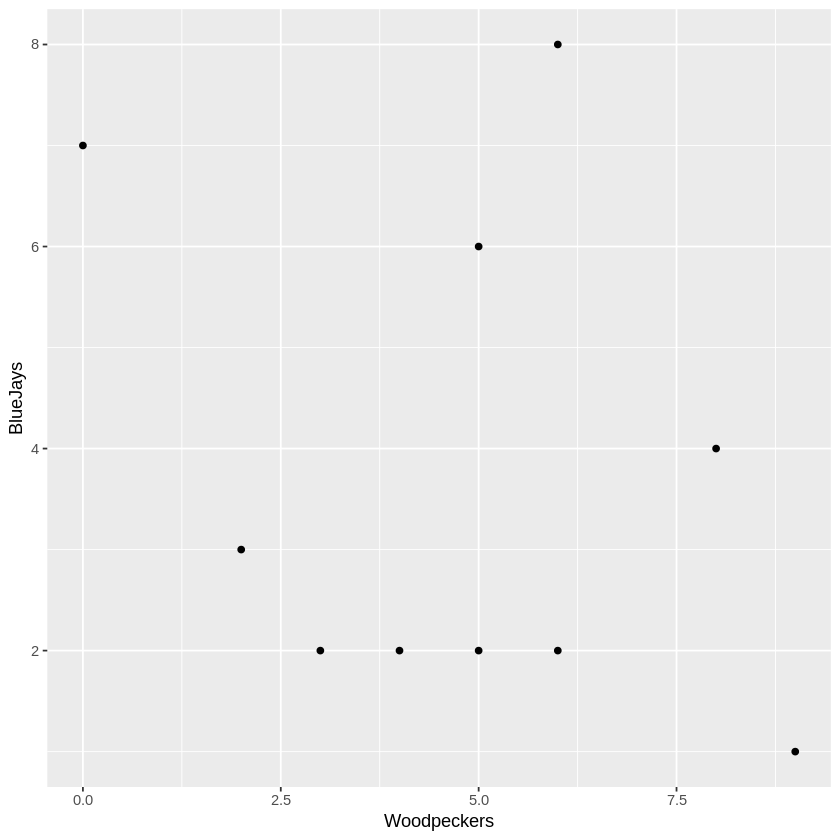

In [18]:
ggplot(birds, aes(x = Woodpeckers, y = BlueJays)) +
  geom_point()
# tweak data so there is a positive association - more of one species, also more of the other

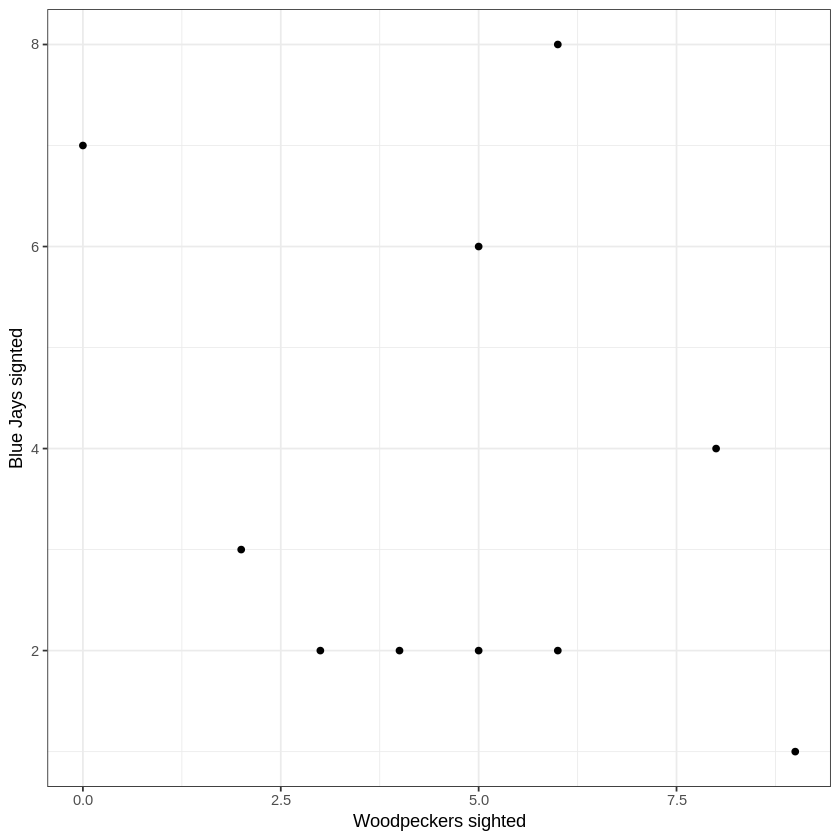

In [20]:
ggplot(birds, aes(x = Woodpeckers, y = BlueJays)) +
  geom_point() +
  theme_bw() +
  xlab ("Woodpeckers sighted") +
  ylab ("Blue Jays signted")
# Same as before but gets rid of gray background and adds better labels

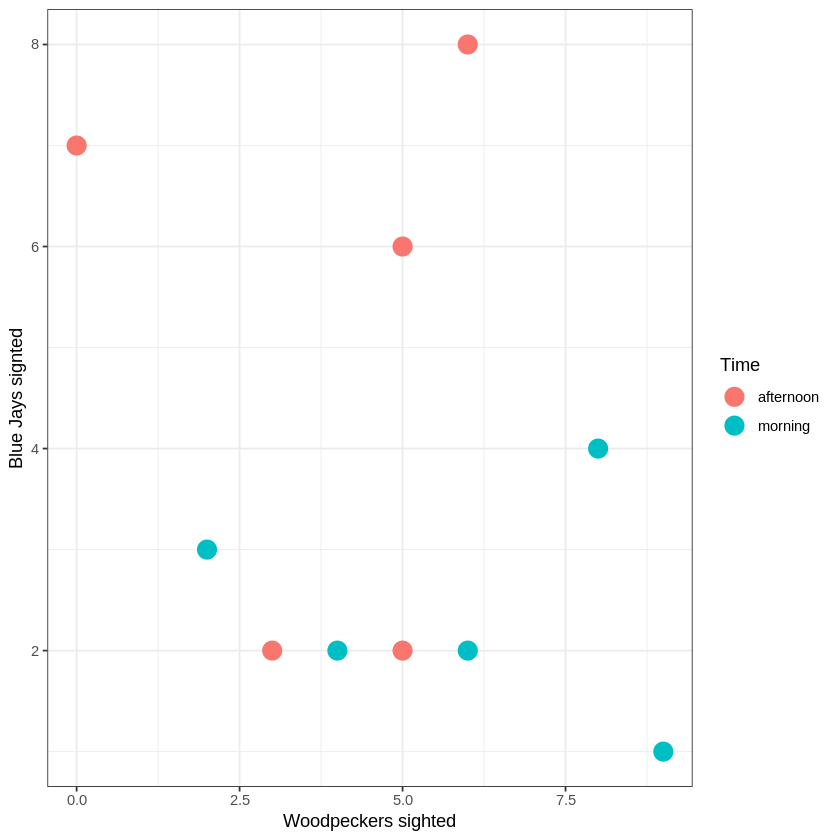

In [22]:
# and the really fun one, adding colors for groups; also making the points bigger
ggplot(birds, aes(x = Woodpeckers, y = BlueJays, colour = Time)) +
  geom_point(size = 5) +
  theme_bw() +
  xlab ("Woodpeckers sighted") +
  ylab ("Blue Jays signted")


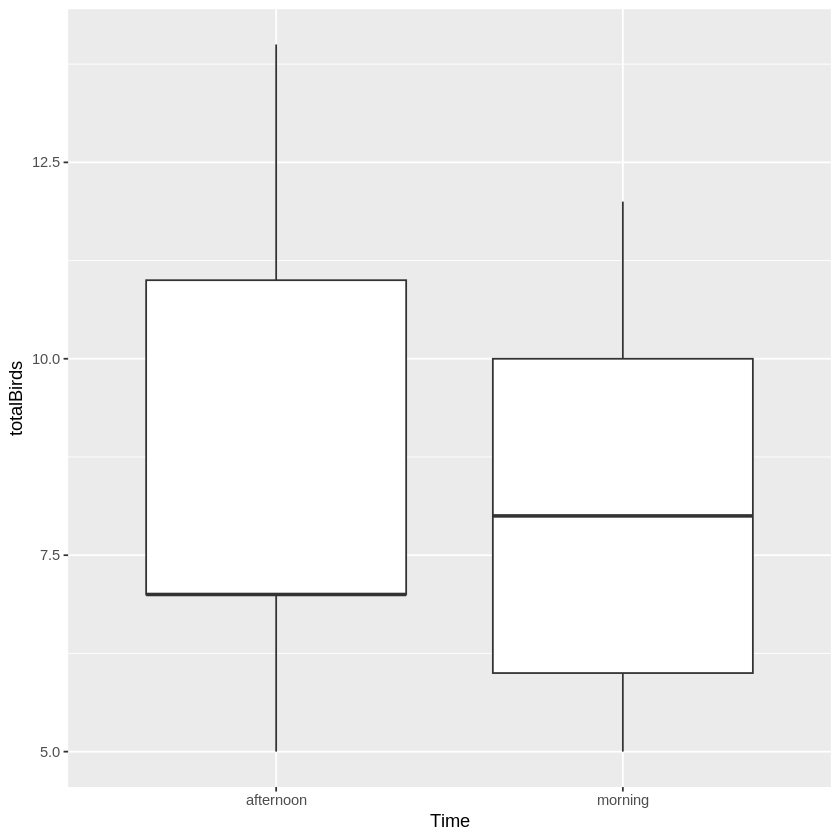

In [24]:
# Here come the bar charts
ggplot(birds, aes (x = Time, y = totalBirds)) +
  geom_boxplot()

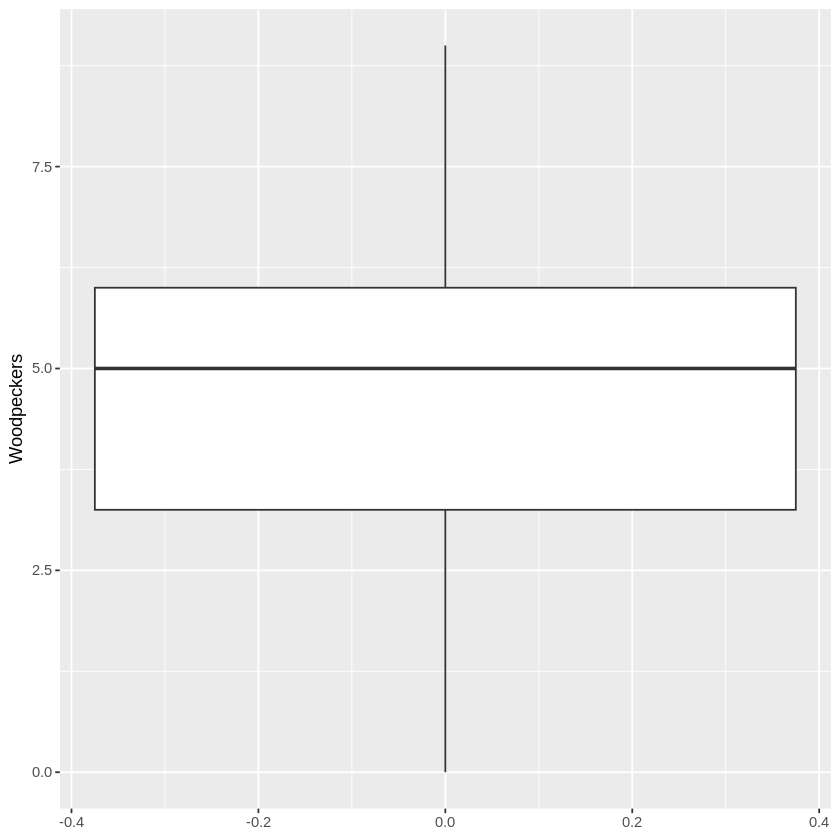

In [25]:
ggplot(birds, aes (y = Woodpeckers)) +
  geom_boxplot()
# great for comparison but not sure my data are truly set up the way it wants so that I can compare the two species

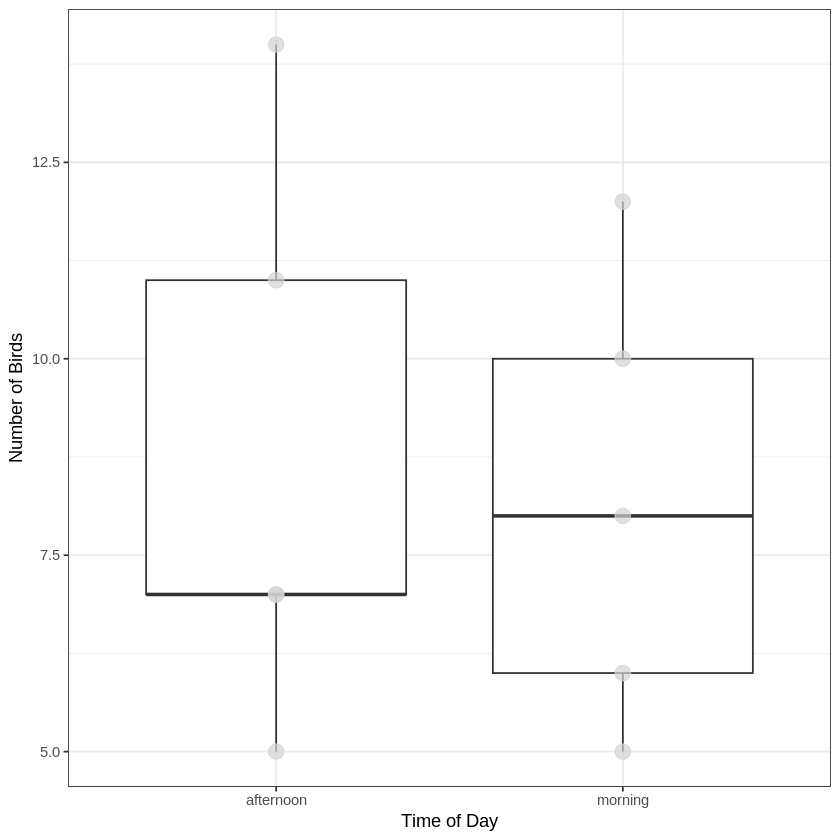

In [30]:
# Tweaking the style
ggplot(birds, aes (x = Time, y = totalBirds)) +
  geom_boxplot() +
  geom_point( size = 4, colour = 'lightgrey', alpha = 0.7) +
  theme_bw() +
  xlab("Time of Day") +
  ylab ("Number of Birds")